In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd

# Load dataset
df1 = pd.read_csv('bcsc_risk_factors_summarized1_092020.csv')
df2 = pd.read_csv('bcsc_risk_factors_summarized2_092020.csv')


Accuracy: 0.7561223688960743
ROC AUC: 0.8897929593451903


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
df1 = pd.read_csv('bcsc_risk_factors_summarized1_092020.csv')
df2 = pd.read_csv('bcsc_risk_factors_summarized2_092020.csv')
df3 = pd.read_csv('bcsc_risk_factors_summarized3_092020.csv')
df = pd.concat([df1, df2, df3], ignore_index=True)

# Prepare features (X) and target (Y)
X = df[['age_group_5_years', 'race_eth', 'first_degree_hx', 'age_menarche', 'bmi_group', 'biophx']]
Y = df['breast_cancer_history']

# Handle missing data and encoding
# Create a pipeline for preprocessing (imputation + encoding)
categorical_features = ['age_group_5_years', 'race_eth', 'first_degree_hx', 'age_menarche', 'bmi_group', 'biophx']
numeric_features = []  # You might want to add any continuous numeric variables here

# Define a transformer for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent category
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), categorical_features)
    ])

# Create a pipeline for the model (including preprocessing + classifier)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # RandomForest with 100 trees
])

# Train-test split by year
train_data = df[df['year'] < 2017]
test_data = df[df['year'] >= 2017]

X_train, X_test = train_data.drop('breast_cancer_history', axis=1), test_data.drop('breast_cancer_history', axis=1)
Y_train, Y_test = train_data['breast_cancer_history'], test_data['breast_cancer_history']

# Fit the model
pipeline.fit(X_train, Y_train)

# Predict and evaluate
predictions = pipeline.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)

# For binary classification, get the probabilities for the positive class (class 1)
roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test), multi_class='ovr') # For binary classification

# Evaluate with confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions)

# Output results
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.6506
ROC AUC: 0.8987
Confusion Matrix:
[[54503   932  2274]
 [13054  1534   692]
 [16623   708  7790]]


In [10]:
df.head()

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
0,2013,7,1,0,9,3,1,1,2,3,0,0,7
1,2013,7,1,0,9,3,1,1,2,3,1,0,3
2,2013,7,1,0,9,3,1,1,2,4,0,0,6
3,2013,7,1,0,9,3,1,1,2,4,1,0,1
4,2013,7,1,0,9,3,1,1,2,4,1,1,1


In [10]:
# Check for missing values
print(df.isnull().sum())

# Example: Impute missing numerical values with the median
df['age_menarche'] = df['age_menarche'].fillna(df['age_menarche'].median())

# Example: Impute missing categorical values with the most frequent category
df['bmi_group'] = df['bmi_group'].fillna(df['bmi_group'].mode()[0])


year                     0
age_group_5_years        0
race_eth                 0
first_degree_hx          0
age_menarche             0
age_first_birth          0
BIRADS_breast_density    0
current_hrt              0
menopaus                 0
bmi_group                0
biophx                   0
breast_cancer_history    0
count                    0
dtype: int64


In [14]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['age_group_5_years', 'race_eth', 'first_degree_hx', 'bmi_group', 'biophx'], drop_first=True)

In [16]:
df.head()

,year,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,breast_cancer_history,count,age_group_5_years_2,age_group_5_years_3,...,race_eth_6,race_eth_9,first_degree_hx_1,first_degree_hx_9,bmi_group_2,bmi_group_3,bmi_group_4,bmi_group_9,biophx_1,biophx_9
0,2013,9,3,1,1,2,0,7,False,False,...,False,False,False,False,False,True,False,False,False,False
1,2013,9,3,1,1,2,0,3,False,False,...,False,False,False,False,False,True,False,False,True,False
2,2013,9,3,1,1,2,0,6,False,False,...,False,False,False,False,False,False,True,False,False,False
3,2013,9,3,1,1,2,0,1,False,False,...,False,False,False,False,False,False,True,False,True,False
4,2013,9,3,1,1,2,1,1,False,False,...,False,False,False,False,False,False,True,False,True,False


In [17]:
# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# Predict and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")


Accuracy: 0.763000713484864
ROC AUC: 0.8987097174744586


In [23]:
import pandas as pd

# Load the data
df = pd.read_csv('bcsc_risk_factors_summarized1_092020.csv')

# Select numerical columns (replace with your actual relevant numerical columns)
numerical_features = df  # Add more columns if needed

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Display the correlation matrix
print(correlation_matrix)

                           year  age_group_5_years  race_eth  first_degree_hx  \
year                   1.000000          -0.146439 -0.013408         0.027401   
age_group_5_years     -0.146439           1.000000 -0.099853        -0.075365   
race_eth              -0.013408          -0.099853  1.000000        -0.027285   
first_degree_hx        0.027401          -0.075365 -0.027285         1.000000   
age_menarche          -0.002972          -0.053993 -0.026346         0.151389   
age_first_birth        0.023769          -0.073747  0.026573         0.146574   
BIRADS_breast_density -0.076510          -0.080559  0.013285         0.025137   
current_hrt           -0.045426           0.172176 -0.081691         0.084604   
menopaus              -0.002149          -0.103745 -0.007124         0.033213   
bmi_group             -0.026914           0.054876  0.021421         0.048286   
biophx                 0.061282           0.044337 -0.072215         0.123168   
breast_cancer_history  0.012

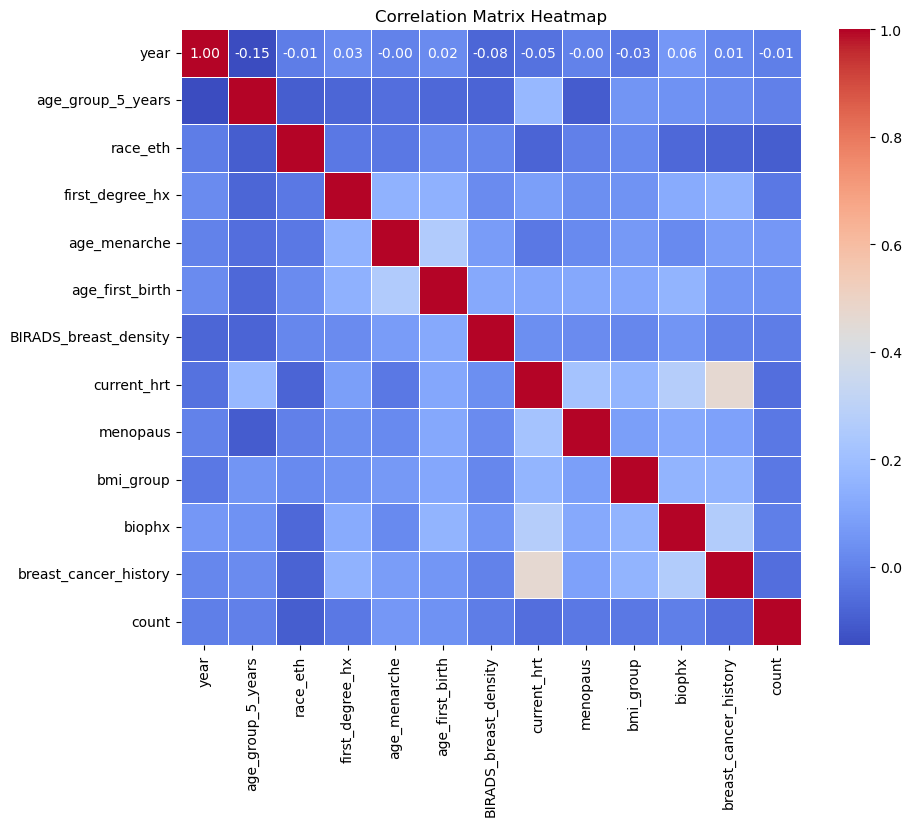

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title("Correlation Matrix Heatmap")
plt.show()


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd

# Load dataset
df1 = pd.read_csv('bcsc_risk_factors_summarized1_092020.csv')
df2 = pd.read_csv('bcsc_risk_factors_summarized2_092020.csv')
df3 = pd.read_csv('bcsc_risk_factors_summarized3_092020.csv')
df=pd.concat([df1, df2, df3], ignore_index=True)
# Prepare X (features) and Y (target)
X = df[['age_group_5_years', 'race_eth', 'first_degree_hx', 'age_menarche', 'bmi_group', 'biophx']]
Y = df['breast_cancer_history']

# Train-test split (with years as a proxy for future prediction)
train_data = df[df['year'] < 2017]
test_data = df[df['year'] >= 2017]

X_train, X_test = train_data.drop('breast_cancer_history', axis=1), test_data.drop('breast_cancer_history', axis=1)
Y_train, Y_test = train_data['breast_cancer_history'], test_data['breast_cancer_history']

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# Predict and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")


KeyboardInterrupt: 

In [27]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
df_filtered = df[df['breast_cancer_history'] != 9]

# Reassign X and Y
X = df_filtered[['age_group_5_years', 'race_eth', 'first_degree_hx', 'age_menarche', 'bmi_group', 'biophx']]
Y = df_filtered['breast_cancer_history']

# Train-test split (with years as a proxy for future prediction)
train_data = df[df['year'] < 2017]
test_data = df[df['year'] >= 2017]


In [37]:
# Check unique values in the target variable
print(Y.unique())


[0 1]


In [39]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# Define the model (GPU-enabled)
model = xgb.XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', use_label_encoder=False)

# Hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Filter out rows where the target variable is 9
df_filtered = df[df['breast_cancer_history'] != 9]

# Reassign X and Y
X = df_filtered[['age_group_5_years', 'race_eth', 'first_degree_hx', 'age_menarche', 'bmi_group', 'biophx']]
Y = df_filtered['breast_cancer_history']

# Train-test split (with years as a proxy for future prediction)
train_data = df[df['year'] < 2017]
test_data = df[df['year'] >= 2017]

X_train, X_test = train_data.drop('breast_cancer_history', axis=1), test_data.drop('breast_cancer_history', axis=1)
Y_train, Y_test = train_data['breast_cancer_history'], test_data['breast_cancer_history']
# Set up GridSearchCV for XGBoost
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model with grid search
grid_search.fit(X_train, Y_train)

# Best parameters found
print("Best parameters for XGBoost: ", grid_search.best_params_)

# Get the best model
best_xgb = grid_search.best_estimator_

# Evaluate the best model on the test set
test_predictions = best_xgb.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_predictions)
test_roc_auc = roc_auc_score(Y_test, best_xgb.predict_proba(X_test), multi_class='ovr')

print(f"Test Accuracy: {test_accuracy}")
print(f"Test ROC AUC: {test_roc_auc}")


Fitting 3 folds for each of 144 candidates, totalling 432 fits


ValueError: 
All the 432 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shrey\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\shrey\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [0 1 9]


In [41]:
# Use df_filtered for both training and test data
train_data = df_filtered[df_filtered['year'] < 2017]
test_data = df_filtered[df_filtered['year'] >= 2017]

# Prepare X and Y for train and test data
X_train, X_test = train_data.drop('breast_cancer_history', axis=1), test_data.drop('breast_cancer_history', axis=1)
Y_train, Y_test = train_data['breast_cancer_history'], test_data['breast_cancer_history']


In [42]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoder = LabelEncoder()

df_filtered['race_eth'] = label_encoder.fit_transform(df_filtered['race_eth'])
df_filtered['age_group_5_years'] = label_encoder.fit_transform(df_filtered['age_group_5_years'])
# Do this for all categorical features


C:\Users\shrey\AppData\Local\Temp\ipykernel_19524\2881477329.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['race_eth'] = label_encoder.fit_transform(df_filtered['race_eth'])
C:\Users\shrey\AppData\Local\Temp\ipykernel_19524\2881477329.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['age_group_5_years'] = label_encoder.fit_transform(df_filtered['age_group_5_years'])


In [43]:
df_filtered = pd.get_dummies(df_filtered, columns=['race_eth', 'age_group_5_years'], drop_first=True)

In [44]:
# For imbalanced classes, you can set scale_pos_weight
# Here's a simple heuristic for setting it, based on the imbalance ratio
scale_pos_weight = len(Y_train) / (2 * sum(Y_train == 1))  # Assuming '1' is the minority class
model = xgb.XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', use_label_encoder=False, scale_pos_weight=scale_pos_weight)


In [45]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
random_search.fit(X_train, Y_train)

# Best parameters found
print("Best parameters for XGBoost: ", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\shrey\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\shrey\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost:  {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 25, 'learning_rate': 0.1, 'colsample_bytree': 0.7}


In [52]:
import numpy as np

# If Y_test is one-hot encoded, convert it to class labels
if len(Y_test.shape) > 1 and Y_test.shape[1] > 1:
    Y_test = np.argmax(Y_test, axis=1)  # Converts from 2D to 1D by selecting the index of the max value

# Check the shape again after conversion
print(Y_test.shape)  # Now it should be (72989,)


(72989,)


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Get the best model from GridSearchCV
best_xgb = random_search.best_estimator_

# Evaluate the best model on the test set
test_predictions = best_xgb.predict(X_test)

# Calculate Accuracy
test_accuracy = accuracy_score(Y_test, test_predictions)

# Calculate ROC AUC for multi-class classification
#test_roc_auc = roc_auc_score(Y_test, best_xgb.predict_proba(X_test), multi_class='ovr')

# Print the results
print(f"Test Accuracy: {test_accuracy}")
#print(f"Test ROC AUC: {test_roc_auc}")

Test Accuracy: 0.8471002479825727
